In [0]:
#tools and data entry
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime as datetime
import math
import numpy as np
import seaborn as sns
from numpy import NaN

In [0]:
from google.colab import files
uploaded = files.upload()   

Saving ac_current.csv to ac_current (1).csv
Saving ac_power.csv to ac_power (1).csv
Saving humidity_in.csv to humidity_in (1).csv
Saving humidity_out.csv to humidity_out (1).csv
Saving occupancy.csv to occupancy (1).csv
Saving temperature_in.csv to temperature_in (1).csv
Saving temperature_out.csv to temperature_out (1).csv


In [0]:
import io
df_hum_in = pd.read_csv(io.BytesIO(uploaded['humidity_in.csv']))

In [0]:
import io
df_hum_out = pd.read_csv(io.BytesIO(uploaded['humidity_out.csv']))

In [0]:
import io
df_temp_in = pd.read_csv(io.BytesIO(uploaded['temperature_in.csv']))

In [0]:
import io
df_temp_out = pd.read_csv(io.BytesIO(uploaded['temperature_out.csv']))

In [0]:
import io
df_power = pd.read_csv(io.BytesIO(uploaded['ac_power.csv']))

In [0]:
import io
df_current = pd.read_csv(io.BytesIO(uploaded['ac_current.csv']))

In [0]:
import io
df_occup = pd.read_csv(io.BytesIO(uploaded['occupancy.csv']))

In [0]:
df_hum_in['statetime'] = pd.to_datetime(df_hum_in['statetime'])
df_hum_out['statetime'] = pd.to_datetime(df_hum_out['statetime'])
df_temp_in['statetime'] = pd.to_datetime(df_temp_in['statetime'])
df_temp_out['statetime'] = pd.to_datetime(df_temp_out['statetime'])
df_power['statetime'] = pd.to_datetime(df_power['statetime'])
df_current['statetime'] = pd.to_datetime(df_current['statetime'])

In [0]:
df_hum_in['humidity_in'] = pd.to_numeric(df_hum_in['humidity_in'], errors='coerce')
df_hum_out['humidity_out'] = pd.to_numeric(df_hum_out['humidity_out'], errors='coerce')
df_temp_in['temp_in'] = pd.to_numeric(df_temp_in['temp_in'], errors='coerce')
df_temp_out['temp_out'] = pd.to_numeric(df_temp_out['temp_out'], errors='coerce')
df_power['ac_pow_power'] = pd.to_numeric(df_power['ac_pow_power'], errors='coerce')
df_current['ac_pow_current'] = pd.to_numeric(df_current['ac_pow_current'], errors='coerce')

In [0]:
df_hum_in = df_hum_in.set_index('statetime') 
df_hum_out = df_hum_out.set_index('statetime')
df_temp_in = df_temp_in.set_index('statetime')
df_temp_out = df_temp_out.set_index('statetime')
df_power = df_power.set_index('statetime')
df_current = df_current.set_index('statetime')

In [0]:
df_hum_out = df_hum_out.resample('min').mean()
df_hum_in = df_hum_in.resample('min').mean()
df_temp_in = df_temp_in.resample('min').mean()
df_temp_out = df_temp_out.resample('min').mean()
df_power = df_power.resample('min').mean()
df_current = df_current.resample('min').mean()

In [0]:
df_hum_out = df_hum_out.sort_values(by=['statetime'])
df_hum_in = df_hum_in.sort_values(by=['statetime'])
df_temp_in = df_temp_in.sort_values(by=['statetime'])
df_temp_out = df_temp_out.sort_values(by=['statetime'])
df_power = df_power.sort_values(by=['statetime'])
df_current = df_current.sort_values(by=['statetime'])

In [0]:
df_hum_out['humidity_out'].interpolate(method='linear', inplace=True)
df_hum_in['humidity_in'].interpolate(method='linear', inplace=True)
df_temp_in['temp_in'].interpolate(method='linear', inplace=True)
df_temp_out['temp_out'].interpolate(method='linear', inplace=True)
#interpolation fills nan values 


In [0]:
df_power['ac_pow_power'] = df_power['ac_pow_power'].fillna(0)

In [0]:
df_current['ac_pow_current'] = df_current['ac_pow_current'].fillna(0)

In [0]:
# Data Frame που τα περιλαμβάνει όλα χωρίς NaN
dflist = [df_hum_out, df_hum_in, df_temp_in, df_temp_out, df_power, df_current, df_occup]
df = df_hum_out
for i in range(1, 6):
  df = df.merge(dflist[i], on='statetime', how='inner', sort=True)

In [0]:
df
#inner join krataei mono ta koina datetimes twn sthlwn. 

,humidity_out,humidity_in,temp_in,temp_out,ac_pow_power,ac_pow_current
statetime,,,,,,
2019-10-23 07:36:00,15.645161,41.500000,27.9250,23.548387,0.000000,0.00000
2019-10-23 07:37:00,15.634409,41.666667,27.9125,23.572581,0.000000,0.00000
2019-10-23 07:38:00,15.623656,41.333333,27.9000,23.596774,0.000000,0.00000
2019-10-23 07:39:00,15.612903,41.000000,27.8875,23.620968,0.000000,0.00000
2019-10-23 07:40:00,15.602151,41.500000,27.8750,23.645161,0.000000,0.00000
...,...,...,...,...,...,...
2019-10-23 14:27:00,7.600000,50.000000,25.1000,40.000000,0.000000,0.00000
2019-10-23 14:28:00,7.500000,49.000000,25.0250,40.000000,0.000000,0.00000
2019-10-23 14:29:00,9.000000,51.000000,24.9500,38.000000,0.000000,0.00000


humidity_out      0
humidity_in       0
temp_in           0
temp_out          0
ac_pow_power      0
ac_pow_current    0
dtype: int64

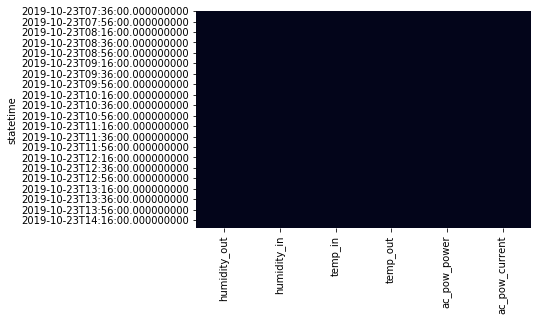

In [0]:
sns.heatmap(df.isnull(), cbar=False)
df.isnull().sum()

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [0]:
#  Outer join Data Frame που περιέχει όλες τις τιμές συν τα κενά κελιά
dflist = [df_hum_out, df_hum_in, df_temp_in, df_temp_out, df_power, df_current, df_occup]
dff = df_hum_out
for i in range(1, 6):
  dff = dff.merge(dflist[i], on='statetime', how='outer', sort=True)

In [0]:
dff['ac_pow_power'] = dff['ac_pow_power'].fillna(0)

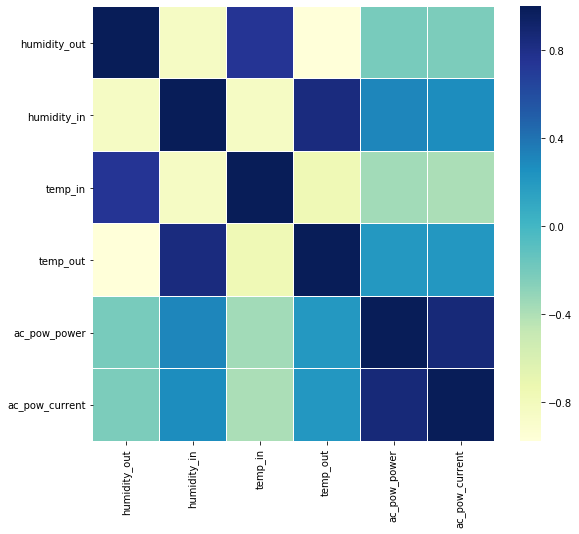

In [0]:
corrmat = dff.corr() 

f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [0]:
dff 

,humidity_out,humidity_in,temp_in,temp_out,ac_pow_power,ac_pow_current
statetime,,,,,,
2019-10-07 14:09:00,NaN,NaN,NaN,NaN,0.0,0.327
2019-10-07 14:10:00,NaN,NaN,NaN,NaN,0.0,0.341
2019-10-07 14:11:00,NaN,NaN,NaN,NaN,0.0,0.000
2019-10-07 14:12:00,NaN,NaN,NaN,NaN,0.0,0.000
2019-10-07 14:13:00,NaN,NaN,NaN,NaN,0.0,0.000
...,...,...,...,...,...,...
2019-10-24 05:54:00,NaN,30.45,NaN,NaN,0.0,NaN
2019-10-24 05:55:00,NaN,30.50,NaN,NaN,0.0,NaN
2019-10-24 05:56:00,NaN,31.00,NaN,NaN,0.0,NaN


In [0]:
# Data frame που περιλαμβάνει τις κοινές σειρές με humidity out και temperature out προκειμένου να εκπαιδευτούν
df1 = df_hum_out.merge(df_temp_out, on='statetime', how='inner', sort=True)

In [0]:
df1

,humidity_out,temp_out
statetime,,
2019-10-20 04:47:00,19.5,22.000000
2019-10-20 04:48:00,19.4,22.034483
2019-10-20 04:49:00,19.3,22.068966
2019-10-20 04:50:00,19.2,22.103448
2019-10-20 04:51:00,19.1,22.137931
...,...,...
2019-10-24 04:39:00,18.0,20.000000
2019-10-24 04:40:00,17.0,21.000000
2019-10-24 04:41:00,18.0,20.000000


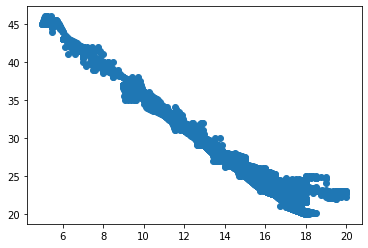

In [0]:
plt.scatter(df1['humidity_out'], df1['temp_out'])

In [0]:
# Εδώ ξεκινάει το linear regression μεταξύ humidity out και temperature out
X = df1.humidity_out.values.reshape((-1,1))
y = df1.temp_out

In [0]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
model = model.fit(X_train,y_train)

In [0]:
r_sq = model.score(X_train, y_train)   #oso kalytero regression toso o r^2 coefficient teinei sthn monada
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9593461987702265


In [0]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 53.48433726393118
slope: [-1.8249046]


In [0]:
y_pred = model.predict(X_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[31.47813476 21.70745011 22.24723154 ... 22.46095911 24.99227839
 27.39057152]


In [0]:
print("MSE:",metrics.mean_squared_error(y_test, y_pred))

MSE: 1.1899611702257331


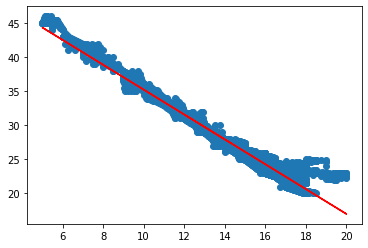

In [0]:
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')
plt.show()

In [0]:
# Αφαιρούμε τις σειρές που το humidity out είναι NaN στο dff
dff = dff.dropna(subset=['humidity_out'])
dff.humidity_out.isnull().sum()
#me ayton ton tropo kratame sto dff mono 19-24 oct

0

In [0]:
dff

,humidity_out,humidity_in,temp_in,temp_out,ac_pow_power,ac_pow_current
statetime,,,,,,
2019-10-19 15:18:00,14.500000,NaN,NaN,NaN,0.0,0.0
2019-10-19 15:19:00,14.785714,NaN,NaN,NaN,0.0,0.0
2019-10-19 15:20:00,15.071429,NaN,NaN,NaN,0.0,0.0
2019-10-19 15:21:00,15.357143,NaN,NaN,NaN,0.0,0.0
2019-10-19 15:22:00,15.642857,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...
2019-10-24 04:39:00,18.000000,31.807692,28.393906,20.0,0.0,NaN
2019-10-24 04:40:00,17.000000,31.794872,28.394044,21.0,0.0,NaN
2019-10-24 04:41:00,18.000000,31.782051,28.394183,20.0,0.0,NaN


In [0]:
# Φτιάχνουμε μια κενή στήλη για να βάλουμε τις καινούργιες τιμές 
# που θα προκύψουν για το temperature out από το regression
from numpy import nan
dff['new_temp_out'] = np.nan   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
dff['new_temp_out'] = model.predict(dff.humidity_out.values.reshape((-1,1))) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# Συμπληρώνουμε τα κενά κελιά του temp_out με τις καινούργιες τιμές που βρήκαμε από το new_temp_out
for i in range(0, len(dff)):
  if math.isnan(dff['temp_out'][i]):
    dff['temp_out'][i] = dff['new_temp_out'][i]  

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


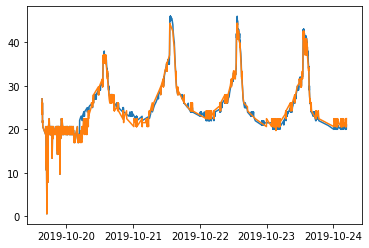

In [0]:
plt.plot(dff['temp_out'])
plt.plot(dff['new_temp_out']) 

In [0]:
# Αφαιρούμε τη στήλη new_temp_out
dff = dff.drop(columns='new_temp_out')

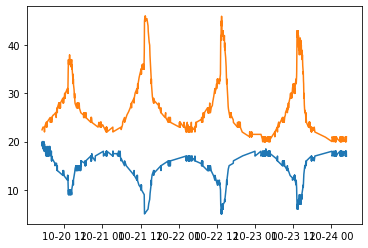

In [0]:
plt.plot(dff['humidity_out']['2019-10-20 05:00:00':'2019-10-24 04:43:00'])
plt.plot(dff['temp_out']['2019-10-20 05:00:00':'2019-10-24 04:43:00'])

In [0]:
dff = dff['2019-10-20 18:00:00':'2019-10-24 04:43:00']
#dff = dff['2019-10-20 05:00:00':'2019-10-24 04:43:00']
#αφαίρεση μετρήσσων λόγω απρόβλεπτων τιμών υγεσίας της ημέρας 19/10 (βροχή, ελλιπή δεδομένα)

In [0]:
dff

,humidity_out,humidity_in,temp_in,temp_out,ac_pow_power,ac_pow_current
statetime,,,,,,
2019-10-20 18:00:00,15.694030,NaN,NaN,25.537037,0.0,0.0
2019-10-20 18:01:00,15.686567,NaN,NaN,25.527778,0.0,0.0
2019-10-20 18:02:00,15.679104,NaN,NaN,25.518519,0.0,0.0
2019-10-20 18:03:00,15.671642,NaN,NaN,25.509259,0.0,0.0
2019-10-20 18:04:00,15.664179,NaN,NaN,25.500000,0.0,0.0
...,...,...,...,...,...,...
2019-10-24 04:39:00,18.000000,31.807692,28.393906,20.000000,0.0,NaN
2019-10-24 04:40:00,17.000000,31.794872,28.394044,21.000000,0.0,NaN
2019-10-24 04:41:00,18.000000,31.782051,28.394183,20.000000,0.0,NaN


In [0]:
dff.corr()

,humidity_out,humidity_in,temp_in,temp_out,ac_pow_power,ac_pow_current
humidity_out,1.000000,-0.843282,0.752275,-0.989026,-0.230930,-0.243577
humidity_in,-0.843282,1.000000,-0.861618,0.845780,0.309453,0.273954
temp_in,0.752275,-0.861618,1.000000,-0.758710,-0.359709,-0.385551
temp_out,-0.989026,0.845780,-0.758710,1.000000,0.224795,0.237266
ac_pow_power,-0.230930,0.309453,-0.359709,0.224795,1.000000,0.908568
ac_pow_current,-0.243577,0.273954,-0.385551,0.237266,0.908568,1.000000


In [0]:
a = dff.dropna(subset=['humidity_out', 'temp_out', 'ac_pow_power', 'temp_in'])

In [0]:
a

,humidity_out,humidity_in,temp_in,temp_out,ac_pow_power,ac_pow_current
statetime,,,,,,
2019-10-23 00:45:00,17.414414,NaN,28.000000,21.5,0.0,0.0
2019-10-23 00:46:00,17.423423,NaN,27.933333,21.5,0.0,0.0
2019-10-23 00:47:00,17.432432,NaN,27.950000,21.5,0.0,0.0
2019-10-23 00:48:00,17.441441,NaN,27.966667,21.5,0.0,0.0
2019-10-23 00:49:00,17.450450,NaN,27.950000,21.5,0.0,0.0
...,...,...,...,...,...,...
2019-10-24 04:39:00,18.000000,31.807692,28.393906,20.0,0.0,NaN
2019-10-24 04:40:00,17.000000,31.794872,28.394044,21.0,0.0,NaN
2019-10-24 04:41:00,18.000000,31.782051,28.394183,20.0,0.0,NaN


In [0]:
# Εκπαίδευση μοντέλου για να βρούμε το temperature in συναρτήσει των humidity out, temp out και ac_power
# Επιλέγουμε ένα Data Frame που περιέχει τις 3 μεταβλητές, χωρίς να περιέχει κενά
X = a.iloc[:, [0,3,4]]
y = a.iloc[:, 2]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [0]:
model2 = model.fit(X_train,y_train)

In [0]:
r_sq = model2.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.5872349254692767


In [0]:
test_score = model2.score(X_test, y_test)
print('Test score:', test_score)

Test score: 0.6018113454082757


In [0]:
print('intercept:', model2.intercept_)
print('slope:', model2.coef_)

intercept: 34.230174608685516
slope: [-0.11375452 -0.1892709  -0.01497752]


In [0]:
y_pred = model2.predict(X_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[28.13238807 28.3633503  28.35941716 28.27430696 27.99344248 27.88395356
 28.07365311 26.94084533 28.3898114  27.54000618 27.8676008  26.83994352
 28.28040415 28.11906183 28.38344509 28.22284889 28.09043453 27.30493797
 26.8084517  28.09226999 28.20281828 28.39717535 27.54460761 28.39717535
 28.32782456 28.32739325 28.39717535 28.08141451 25.05332205 27.81725654
 27.36858013 28.39166894 28.12556679 24.63079641 28.38151951 28.38616254
 26.78149527 28.16663395 28.38380265 26.07080715 28.10721594 28.27366582
 28.20152598 28.32599465 27.79879635 28.22176369 28.05909374 27.55271522
 28.08204382 28.20734132 28.02577814 28.35941716 28.21273724 26.38541748
 28.35941716 25.40899894 28.33784105 28.24611024 28.20822401 28.16553459
 28.23900261 28.15048023 28.39481546 28.28566411 28.13581494 27.92867833
 28.11839308 28.34129323 27.82228813 28.33827257 28.27619618 28.35035519
 28.35941716 27.61385995 28.23254112 28.06395135 27.55906973 27.62820709
 25.93857349 27.80152396 28.321

In [0]:
print("MSE:",metrics.mean_squared_error(y_test, y_pred))

MSE: 0.3634865795766536


In [0]:
b = dff[['humidity_out', 'temp_out', 'ac_pow_power']]
#['2019-10-20 03:18:00':'2019-10-24 05:58:00']

In [0]:
b = b.dropna(subset=['ac_pow_power'])

In [0]:
b

,humidity_out,temp_out,ac_pow_power
statetime,,,
2019-10-20 18:00:00,15.694030,25.537037,0.0
2019-10-20 18:01:00,15.686567,25.527778,0.0
2019-10-20 18:02:00,15.679104,25.518519,0.0
2019-10-20 18:03:00,15.671642,25.509259,0.0
2019-10-20 18:04:00,15.664179,25.500000,0.0
...,...,...,...
2019-10-24 04:39:00,18.000000,20.000000,0.0
2019-10-24 04:40:00,17.000000,21.000000,0.0
2019-10-24 04:41:00,18.000000,20.000000,0.0


In [0]:
b.isna().sum()

humidity_out    0
temp_out        0
ac_pow_power    0
dtype: int64

In [0]:
b['new_temp_in'] = model2.predict(b)

In [0]:
dff = dff.merge(b['new_temp_in'], how='outer', on='statetime', sort='True' )

In [0]:
dff 

,humidity_out,humidity_in,temp_in,temp_out,ac_pow_power,ac_pow_current,new_temp_in
statetime,,,,,,,
2019-10-20 18:00:00,15.694030,NaN,NaN,25.537037,0.0,0.0,27.611490
2019-10-20 18:01:00,15.686567,NaN,NaN,25.527778,0.0,0.0,27.614091
2019-10-20 18:02:00,15.679104,NaN,NaN,25.518519,0.0,0.0,27.616693
2019-10-20 18:03:00,15.671642,NaN,NaN,25.509259,0.0,0.0,27.619294
2019-10-20 18:04:00,15.664179,NaN,NaN,25.500000,0.0,0.0,27.621896
...,...,...,...,...,...,...,...
2019-10-24 04:39:00,18.000000,31.807692,28.393906,20.000000,0.0,NaN,28.397175
2019-10-24 04:40:00,17.000000,31.794872,28.394044,21.000000,0.0,NaN,28.321659
2019-10-24 04:41:00,18.000000,31.782051,28.394183,20.000000,0.0,NaN,28.397175


In [0]:
dff['new_temp_in'].isna().sum()

0

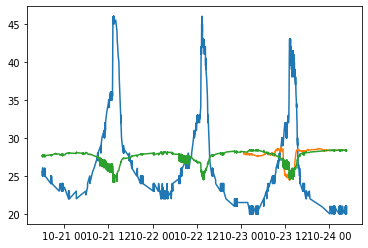

In [0]:
#plt.plot()
plt.plot(dff['temp_out'])
plt.plot(dff['temp_in'])
plt.plot(dff['new_temp_in'])

In [0]:
for i in range(0, len(dff)):
  if math.isnan(dff['temp_in'][i]):
    dff['temp_in'][i] = dff['new_temp_in'][i]

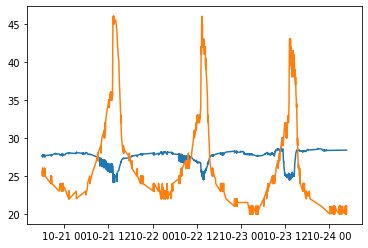

In [0]:
plt.plot(dff['temp_in'])
plt.plot(dff['temp_out'])

In [0]:
dff = dff.drop(columns='new_temp_in')

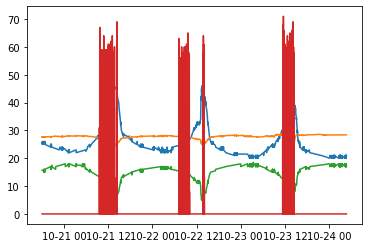

In [0]:
plt.plot(dff['temp_out'])
plt.plot(dff['temp_in'])
plt.plot(dff['humidity_out'])
plt.plot(dff['ac_pow_power'])
#plt.plot(dff['humidity_in'])

In [0]:
dff.isna().sum()

humidity_out         0
humidity_in       3696
temp_in              0
temp_out             0
ac_pow_power         0
ac_pow_current     852
dtype: int64

In [0]:
corrfinal = dff.corr()

In [0]:
corrfinal

,humidity_out,humidity_in,temp_in,temp_out,ac_pow_power,ac_pow_current
humidity_out,1.000000,-0.843282,0.868956,-0.989026,-0.230930,-0.243577
humidity_in,-0.843282,1.000000,-0.861618,0.845780,0.309453,0.273954
temp_in,0.868956,-0.861618,1.000000,-0.885287,-0.345413,-0.360089
temp_out,-0.989026,0.845780,-0.885287,1.000000,0.224795,0.237266
ac_pow_power,-0.230930,0.309453,-0.345413,0.224795,1.000000,0.908568
ac_pow_current,-0.243577,0.273954,-0.360089,0.237266,0.908568,1.000000


In [0]:
# εκπαίδευση μοντέλου για να συμπληρώσουμε τις τιμές του humidity in συναρτήσει του humidity out και temperature in
a = dff.dropna(subset=['humidity_out','humidity_in', 'temp_in'])

In [0]:
a['humidity_in'].isna().sum()

0

In [0]:
X = a.iloc[:, [0,2]]
X.isnull().sum()

humidity_out    0
temp_in         0
dtype: int64

In [0]:
X

,humidity_out,temp_in
statetime,,
2019-10-23 07:36:00,15.645161,27.925000
2019-10-23 07:37:00,15.634409,27.912500
2019-10-23 07:38:00,15.623656,27.900000
2019-10-23 07:39:00,15.612903,27.887500
2019-10-23 07:40:00,15.602151,27.875000
...,...,...
2019-10-24 04:39:00,18.000000,28.393906
2019-10-24 04:40:00,17.000000,28.394044
2019-10-24 04:41:00,18.000000,28.394183


In [0]:
y = a.iloc[:, 1]
y.isnull().sum()

0

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
model3 = LinearRegression()
model3 = model.fit(X_train,y_train)

In [0]:
r_sq = model3.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.794494032994229


In [0]:
test_score = model3.score(X_test, y_test)
print('Test_score:', test_score)

Test_score: 0.8274619876365421


In [0]:
print('intercept:', model3.intercept_)
print('slope:', model3.coef_)

intercept: 114.23008766852978
slope: [-0.7185215  -2.35218788]


In [0]:
y_pred = model3.predict(X_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[35.07926701 45.85796922 34.99315085 34.99441911 34.81778207 34.45207771
 35.34352854 37.02072293 41.0398857  34.78436179 34.64187    35.08259642
 37.68887357 34.65919839 36.08355919 35.63363846 34.44019958 37.73580274
 45.97129024 36.1209046  42.97813629 34.44613865 34.93527269 35.02381155
 34.67738272 37.48822302 34.82441458 39.25079929 46.67909079 34.70582678
 38.19310309 34.53659162 34.89475307 36.20332624 35.07517512 35.73831974
 36.1067373  41.80122063 50.99665233 34.6748461  35.89641545 37.8051079
 35.62553363 37.66634989 34.92976845 50.59673224 34.64947987 35.61233103
 34.52287472 49.31795798 37.52952869 34.88868503 35.25771941 35.12335566
 37.77400322 35.93523699 43.50363715 42.16203239 49.2786333  34.88188609
 36.06038107 47.31592897 37.65024338 34.44811833 37.2132679  34.80300367
 34.62414333 34.84096329 35.00806435 35.61999693 37.75783496 36.98641994
 37.0629889  34.69078737 34.66591189 46.443872   45.51025114 35.93733741
 44.63680238 50.44489607 36.8865

In [0]:
print("MSE:",metrics.mean_squared_error(y_test, y_pred))

MSE: 5.013330972432628


In [0]:
x = dff.iloc[:, [0,2]]

In [0]:
x

,humidity_out,temp_in
statetime,,
2019-10-20 18:00:00,15.694030,27.611490
2019-10-20 18:01:00,15.686567,27.614091
2019-10-20 18:02:00,15.679104,27.616693
2019-10-20 18:03:00,15.671642,27.619294
2019-10-20 18:04:00,15.664179,27.621896
...,...,...
2019-10-24 04:39:00,18.000000,28.393906
2019-10-24 04:40:00,17.000000,28.394044
2019-10-24 04:41:00,18.000000,28.394183


In [0]:
x.isnull().sum()

humidity_out    0
temp_in         0
dtype: int64

In [0]:
x['new_hum_in'] = model3.predict(x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
#flag

In [0]:
x

,humidity_out,temp_in,new_hum_in
statetime,,,
2019-10-20 18:00:00,15.694030,27.611490,38.006178
2019-10-20 18:01:00,15.686567,27.614091,38.005421
2019-10-20 18:02:00,15.679104,27.616693,38.004664
2019-10-20 18:03:00,15.671642,27.619294,38.003907
2019-10-20 18:04:00,15.664179,27.621896,38.003150
...,...,...,...
2019-10-24 04:39:00,18.000000,28.393906,34.508900
2019-10-24 04:40:00,17.000000,28.394044,35.227095
2019-10-24 04:41:00,18.000000,28.394183,34.508248


In [0]:
dff = dff.merge(x['new_hum_in'], how='outer', on='statetime', sort=True)

In [0]:
for i in range(0, len(dff)):
  if math.isnan(dff['humidity_in'][i]):
    dff['humidity_in'][i] = dff['new_hum_in'][i] 

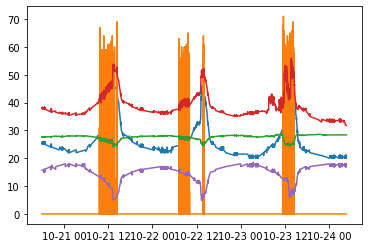

In [0]:
plt.plot(dff['temp_out'],label = 'temp_out')
plt.plot(dff['ac_pow_power'])
plt.plot(dff['temp_in'])
plt.plot(dff['humidity_in'])
plt.plot(dff['humidity_out'])
plt.show()

In [0]:
dff = dff.drop(columns='new_hum_in')

In [0]:
df_occup['statetime'] = pd.to_datetime(df_occup['statetime'])

In [0]:
df_occup = df_occup.set_index('statetime')

In [0]:
df_occup = df_occup.replace("EA674E", 1)

In [0]:
df_occup = df_occup.resample('min').max()

In [0]:
df_occup.isnull().sum()

motion_detected    2486
dtype: int64

In [0]:
dff = dff.merge(df_occup, how='outer', on='statetime')

In [0]:
dff['motion_detected'] = dff['motion_detected'].fillna(0)

In [0]:
from sklearn import tree

In [0]:
dff['AC'] = dff['ac_pow_power']

In [0]:
dff['AC'] = dff['AC'].fillna(0)

In [0]:
dff

,humidity_out,humidity_in,temp_in,temp_out,ac_pow_power,ac_pow_current,motion_detected,AC
statetime,,,,,,,,
2019-10-20 18:00:00,15.694030,38.006178,27.611490,25.537037,0.0,0.0,0.0,0.0
2019-10-20 18:01:00,15.686567,38.005421,27.614091,25.527778,0.0,0.0,0.0,0.0
2019-10-20 18:02:00,15.679104,38.004664,27.616693,25.518519,0.0,0.0,0.0,0.0
2019-10-20 18:03:00,15.671642,38.003907,27.619294,25.509259,0.0,0.0,0.0,0.0
2019-10-20 18:04:00,15.664179,38.003150,27.621896,25.500000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2019-10-24 05:49:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
2019-10-24 05:50:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
2019-10-24 05:51:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0


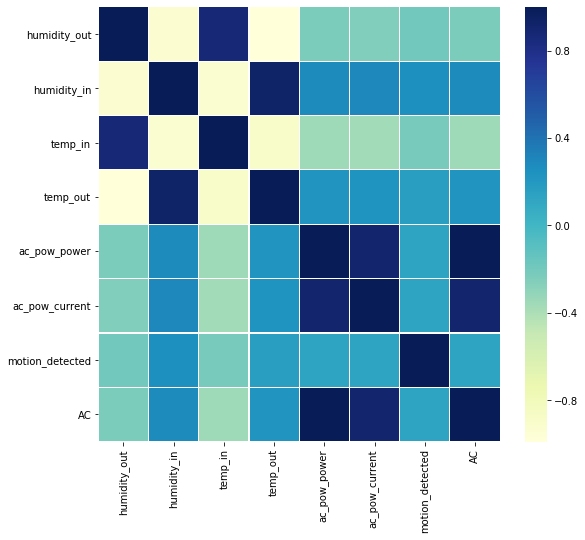

In [0]:
corrmat = dff.corr() 

f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [0]:
dff

,humidity_out,humidity_in,temp_in,temp_out,ac_pow_power,ac_pow_current,motion_detected,AC
statetime,,,,,,,,
2019-10-20 18:00:00,15.694030,38.006178,27.611490,25.537037,0.0,0.0,0.0,0.0
2019-10-20 18:01:00,15.686567,38.005421,27.614091,25.527778,0.0,0.0,0.0,0.0
2019-10-20 18:02:00,15.679104,38.004664,27.616693,25.518519,0.0,0.0,0.0,0.0
2019-10-20 18:03:00,15.671642,38.003907,27.619294,25.509259,0.0,0.0,0.0,0.0
2019-10-20 18:04:00,15.664179,38.003150,27.621896,25.500000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2019-10-24 05:49:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
2019-10-24 05:50:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
2019-10-24 05:51:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0


In [0]:
#dff['AC'] = pd.cut(dff['AC'],2,labels=['off', 'on'])
for i in range(0, len(dff['AC'])):
  if dff['AC'][i] != 0:
    dff['AC'][i] = 1

In [0]:
#dff['AC'] =dff['AC'].fillna('off')

In [0]:
dff['AC'].isna().sum()

0

In [0]:
verydff = dff

In [0]:
verydff.corr() 

,humidity_out,humidity_in,temp_in,temp_out,ac_pow_power,ac_pow_current,motion_detected,AC
humidity_out,1.000000,-0.929648,0.868956,-0.989026,-0.230930,-0.243577,-0.192800,-0.254568
humidity_in,-0.929648,1.000000,-0.926640,0.932514,0.281853,0.299533,0.255416,0.305010
temp_in,0.868956,-0.926640,1.000000,-0.885287,-0.345413,-0.360089,-0.216785,-0.362126
temp_out,-0.989026,0.932514,-0.885287,1.000000,0.224795,0.237266,0.167226,0.249919
ac_pow_power,-0.230930,0.281853,-0.345413,0.224795,1.000000,0.908568,0.131060,0.951019
ac_pow_current,-0.243577,0.299533,-0.360089,0.237266,0.908568,1.000000,0.127127,0.922754
motion_detected,-0.192800,0.255416,-0.216785,0.167226,0.131060,0.127127,1.000000,0.130929
AC,-0.254568,0.305010,-0.362126,0.249919,0.951019,0.922754,0.130929,1.000000


In [0]:
verydff = verydff.drop(columns='ac_pow_power')

In [0]:
verydff = verydff.drop(columns='ac_pow_current')

In [0]:
verydff.isna().sum()

humidity_out       70
humidity_in        70
temp_in            70
temp_out           70
motion_detected     0
AC                  0
dtype: int64

In [0]:
verydff

,humidity_out,humidity_in,temp_in,temp_out,motion_detected,AC
statetime,,,,,,
2019-10-20 18:00:00,15.694030,38.006178,27.611490,25.537037,0.0,0.0
2019-10-20 18:01:00,15.686567,38.005421,27.614091,25.527778,0.0,0.0
2019-10-20 18:02:00,15.679104,38.004664,27.616693,25.518519,0.0,0.0
2019-10-20 18:03:00,15.671642,38.003907,27.619294,25.509259,0.0,0.0
2019-10-20 18:04:00,15.664179,38.003150,27.621896,25.500000,0.0,0.0
...,...,...,...,...,...,...
2019-10-24 05:49:00,NaN,NaN,NaN,NaN,1.0,0.0
2019-10-24 05:50:00,NaN,NaN,NaN,NaN,1.0,0.0
2019-10-24 05:51:00,NaN,NaN,NaN,NaN,1.0,0.0


In [0]:
XX = verydff.dropna(subset=['humidity_in','humidity_out','temp_in','temp_out'])

In [0]:
XX

,humidity_out,humidity_in,temp_in,temp_out,motion_detected,AC
statetime,,,,,,
2019-10-20 18:00:00,15.694030,38.006178,27.611490,25.537037,0.0,0.0
2019-10-20 18:01:00,15.686567,38.005421,27.614091,25.527778,0.0,0.0
2019-10-20 18:02:00,15.679104,38.004664,27.616693,25.518519,0.0,0.0
2019-10-20 18:03:00,15.671642,38.003907,27.619294,25.509259,0.0,0.0
2019-10-20 18:04:00,15.664179,38.003150,27.621896,25.500000,0.0,0.0
...,...,...,...,...,...,...
2019-10-24 04:39:00,18.000000,31.807692,28.393906,20.000000,0.0,0.0
2019-10-24 04:40:00,17.000000,31.794872,28.394044,21.000000,0.0,0.0
2019-10-24 04:41:00,18.000000,31.782051,28.394183,20.000000,0.0,0.0


In [0]:
X = XX.iloc[:,:-1]
y= XX.iloc[:, -1]

In [0]:
XX.isna().sum()

humidity_out       0
humidity_in        0
temp_in            0
temp_out           0
motion_detected    0
AC                 0
dtype: int64

In [0]:
X

,humidity_out,humidity_in,temp_in,temp_out,motion_detected
statetime,,,,,
2019-10-20 18:00:00,15.694030,38.006178,27.611490,25.537037,0.0
2019-10-20 18:01:00,15.686567,38.005421,27.614091,25.527778,0.0
2019-10-20 18:02:00,15.679104,38.004664,27.616693,25.518519,0.0
2019-10-20 18:03:00,15.671642,38.003907,27.619294,25.509259,0.0
2019-10-20 18:04:00,15.664179,38.003150,27.621896,25.500000,0.0
...,...,...,...,...,...
2019-10-24 04:39:00,18.000000,31.807692,28.393906,20.000000,0.0
2019-10-24 04:40:00,17.000000,31.794872,28.394044,21.000000,0.0
2019-10-24 04:41:00,18.000000,31.782051,28.394183,20.000000,0.0


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
model4 = tree.DecisionTreeClassifier()

In [0]:
model4 = model4.fit(X_train, y_train)

In [0]:
y_pred = model4.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None))

[[1435   16]
 [  10   29]]


In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #swsta to vgazei epalhtheysh me xeri

Accuracy: 0.9825503355704698


In [0]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average = 'micro')

0.9825503355704698

In [0]:
metrics.recall_score(y_test, y_pred) 

0.7435897435897436

In [0]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.6444444444444445

In [0]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.6904761904761906

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None)

array([[1435,   16],
       [  10,   29]])

In [0]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_lr = clf.predict(X_test)


In [0]:
recall_score(y_test, y_pred_lr, average='micro')

0.9644295302013423

In [0]:
precision_score(y_test, y_pred_lr, average = 'micro')

0.9644295302013423

In [0]:
f1_score(y_test, y_pred_lr, average='micro')

0.9644295302013423

In [0]:
metrics.accuracy_score(y_test, y_pred_lr)

0.9644295302013423

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
for a in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
  rfc = rfc.fit(X_train,y_train,)
  y_pred = rfc.predict(X_test)
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9899328859060402
Accuracy: 0.9859060402684564
Accuracy: 0.9879194630872483
Accuracy: 0.9885906040268456
Accuracy: 0.9865771812080537
Accuracy: 0.9798657718120806
Accuracy: 0.9798657718120806
Accuracy: 0.9899328859060402
Accuracy: 0.987248322147651
Accuracy: 0.9845637583892617


In [0]:
recall_score(y_test, y_pred, average='micro')

0.9845637583892617

In [0]:
precision_score(y_test, y_pred, average='micro')

0.9845637583892617

In [0]:
f1_score(y_test, y_pred, average='micro')

0.9845637583892617

In [0]:
from sklearn.svm import SVC
clf = SVC(gamma= 'scale', kernel = 'rbf')
#clf = SVC(gamma= 'auto', kernel = 'linear')
#clf = SVC(gamma= 'scale', kernel = 'poly', degree= 3) degree= 3 by default

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svm_model = clf.fit(X, y)
#print(clf.predict())
y_pred_svm = clf.predict (X_test)

In [0]:
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred_svm))

Accuracy test: 0.9818791946308725


In [0]:
recall_score(y_test, y_pred_svm)

0.0

In [0]:
precision_score(y_test, y_pred_svm, average='micro')

0.9818791946308725

In [0]:
f1_score(y_test, y_pred_svm)
confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None)

array([[1433,   30],
       [  26,    1]])

In [0]:
from google.colab import files
uploaded = files.upload()    

Saving ac_statetime_test.csv to ac_statetime_test (1).csv
Saving humidity_in_test.csv to humidity_in_test (1).csv
Saving humidity_out_test.csv to humidity_out_test (1).csv
Saving occupancy_test.csv to occupancy_test (1).csv
Saving temperature_in_test.csv to temperature_in_test (1).csv
Saving temperature_out_test.csv to temperature_out_test (1).csv


In [0]:
import io
df_hum_in = pd.read_csv(io.BytesIO(uploaded['humidity_in_test.csv']))
import io
df_hum_out = pd.read_csv(io.BytesIO(uploaded['humidity_out_test.csv']))
import io
df_occup = pd.read_csv(io.BytesIO(uploaded['occupancy_test.csv']))
import io
df_temp_in = pd.read_csv(io.BytesIO(uploaded['temperature_in_test.csv']))
import io
df_temp_out = pd.read_csv(io.BytesIO(uploaded['temperature_out_test.csv']))
import io
df_ac_statetime= pd.read_csv(io.BytesIO(uploaded['ac_statetime_test.csv']))

In [0]:
df_hum_in['statetime'] = pd.to_datetime(df_hum_in['statetime'])
df_hum_out['statetime'] = pd.to_datetime(df_hum_out['statetime'])
df_temp_in['statetime'] = pd.to_datetime(df_temp_in['statetime'])
df_temp_out['statetime'] = pd.to_datetime(df_temp_out['statetime'])
df_occup['statetime'] = pd.to_datetime(df_occup['statetime'])


In [0]:
df_ac_statetime['statetime'] = pd.to_datetime(df_ac_statetime['statetime'])

In [0]:
df_hum_in['humidity_in'] = pd.to_numeric(df_hum_in['humidity_in'], errors='coerce')
df_hum_out['humidity_out'] = pd.to_numeric(df_hum_out['humidity_out'], errors='coerce')
df_temp_in['temp_in'] = pd.to_numeric(df_temp_in['temperature_in'], errors='coerce')
df_temp_out['temp_out'] = pd.to_numeric(df_temp_out['temperature_out'], errors='coerce')

In [0]:
df_hum_in = df_hum_in.set_index('statetime')   
df_hum_out = df_hum_out.set_index('statetime')
df_temp_in = df_temp_in.set_index('statetime')
df_temp_out = df_temp_out.set_index('statetime')

In [0]:
df_hum_out = df_hum_out.resample('min').mean()
df_hum_in = df_hum_in.resample('min').mean()
df_temp_in = df_temp_in.resample('min').mean()
df_temp_out = df_temp_out.resample('min').mean()

In [0]:
df_hum_out = df_hum_out.sort_values(by=['statetime'])
df_hum_in = df_hum_in.sort_values(by=['statetime'])
df_temp_in = df_temp_in.sort_values(by=['statetime'])
df_temp_out = df_temp_out.sort_values(by=['statetime'])

In [0]:
df_hum_out['humidity_out'].interpolate(method='linear', inplace=True)
df_hum_in['humidity_in'].interpolate(method='linear', inplace=True)
df_temp_in['temp_in'].interpolate(method='linear', inplace=True)
df_temp_out['temp_out'].interpolate(method='linear', inplace=True)

In [0]:
dflist = [df_hum_out, df_hum_in, df_temp_in, df_temp_out, df_ac_statetime]
newdf = df_hum_out
for i in range(1, 5):
  newdf = newdf.merge(dflist[i], on='statetime', how='outer', sort=True)

In [0]:
df_occup['statetime'] = pd.to_datetime(df_occup['statetime'])

In [0]:
df_occup = df_occup.set_index('statetime')

In [0]:
df_occup = df_occup.replace("EA674E", 1)

In [0]:
df_occup = df_occup.resample('min').max()

In [0]:
newdf = newdf.merge(df_occup, on='statetime', how='outer', sort=True)

In [0]:
newdf['motion_detected'] = newdf['motion_detected'].fillna(0)

In [0]:
newdf = newdf.set_index('statetime')

In [0]:
newdf = newdf.dropna(how='any')

In [0]:
newdf

,humidity_out,humidity_in,temp_in,temp_out,motion_detected
statetime,,,,,
2019-09-01 04:31:00,15.500000,30.541667,33.650000,26.017857,0.0
2019-09-01 04:32:00,15.472727,30.583333,33.654167,26.035714,0.0
2019-09-01 04:33:00,15.445455,30.625000,33.658333,26.053571,0.0
2019-09-01 04:34:00,15.418182,30.666667,33.662500,26.071429,0.0
2019-09-01 04:35:00,15.390909,30.500000,33.666667,26.089286,0.0
...,...,...,...,...,...
2019-09-30 23:24:00,18.228571,49.500000,30.250000,24.771429,0.0
2019-09-30 23:25:00,18.200000,49.500000,30.233333,24.800000,0.0
2019-09-30 23:26:00,18.171429,49.500000,30.216667,24.828571,0.0


In [0]:
X = newdf.dropna()

In [0]:
X

,humidity_out,humidity_in,temp_in,temp_out,motion_detected
statetime,,,,,
2019-09-01 04:31:00,15.500000,30.541667,33.650000,26.017857,0.0
2019-09-01 04:32:00,15.472727,30.583333,33.654167,26.035714,0.0
2019-09-01 04:33:00,15.445455,30.625000,33.658333,26.053571,0.0
2019-09-01 04:34:00,15.418182,30.666667,33.662500,26.071429,0.0
2019-09-01 04:35:00,15.390909,30.500000,33.666667,26.089286,0.0
...,...,...,...,...,...
2019-09-30 23:24:00,18.228571,49.500000,30.250000,24.771429,0.0
2019-09-30 23:25:00,18.200000,49.500000,30.233333,24.800000,0.0
2019-09-30 23:26:00,18.171429,49.500000,30.216667,24.828571,0.0


In [0]:
X['AC'] = np.nan

In [0]:
XA = X.iloc[:, : -1]

In [0]:
XA

,humidity_out,humidity_in,temp_in,temp_out,motion_detected
statetime,,,,,
2019-09-01 04:31:00,15.500000,30.541667,33.650000,26.017857,0.0
2019-09-01 04:32:00,15.472727,30.583333,33.654167,26.035714,0.0
2019-09-01 04:33:00,15.445455,30.625000,33.658333,26.053571,0.0
2019-09-01 04:34:00,15.418182,30.666667,33.662500,26.071429,0.0
2019-09-01 04:35:00,15.390909,30.500000,33.666667,26.089286,0.0
...,...,...,...,...,...
2019-09-30 23:24:00,18.228571,49.500000,30.250000,24.771429,0.0
2019-09-30 23:25:00,18.200000,49.500000,30.233333,24.800000,0.0
2019-09-30 23:26:00,18.171429,49.500000,30.216667,24.828571,0.0


In [0]:
XA.isna().sum()

humidity_out       0
humidity_in        0
temp_in            0
temp_out           0
motion_detected    0
dtype: int64

In [0]:
XA['AC'] = model4.predict(XA)

In [0]:
XA.isna().sum()

humidity_out       0
humidity_in        0
temp_in            0
temp_out           0
motion_detected    0
AC                 0
dtype: int64

In [0]:
XA['motion_detected'] = XA['motion_detected'].fillna(0)

In [0]:
XA.tail()

,humidity_out,humidity_in,temp_in,temp_out,motion_detected,AC
statetime,,,,,,
2019-09-30 23:24:00,18.228571,49.500000,30.250000,24.771429,0.0,0.0
2019-09-30 23:25:00,18.200000,49.500000,30.233333,24.800000,0.0,0.0
2019-09-30 23:26:00,18.171429,49.500000,30.216667,24.828571,0.0,0.0
2019-09-30 23:27:00,18.142857,49.666667,30.200000,24.857143,0.0,0.0
2019-09-30 23:28:00,18.114286,49.333333,30.300000,24.885714,0.0,0.0


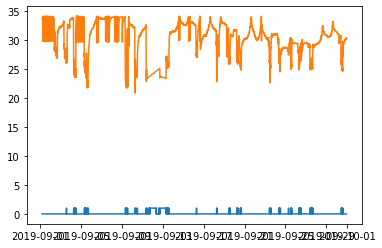

In [0]:
plt.plot(XA['AC'])
plt.plot(XA['temp_in'])

In [0]:
# σε αυτό το σημείο θα μπορούσαμε να αναπτύξουμε ένα προγνωστικό μοντέλο με την παρακάτω προσθήκη, 
# έτσι ώστε η τιμή του AC να συνυπολογίζει και το αν υπάρχει κίνηση 15 λεπτά μετά και 15 λεπτά πριν

for i in range(15, len(XA)):
  if ((XA['AC'][i] == 1) &  (XA['motion_detected'][i] == 0)):
    if (XA['motion_detected'][i-15:i+15].sum() == 0):
      XA['AC'][i] = 0

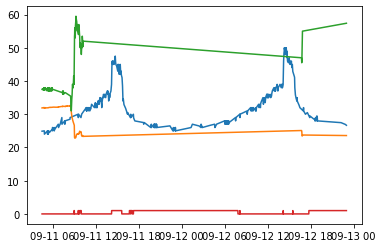

In [0]:
plt.plot(XA['temp_out']['2019-09-11 04:31:00':'2019-09-12 23:00:00'])
plt.plot(XA['temp_in']['2019-09-11 04:31:00':'2019-09-12 23:00:00']) 
plt.plot(XA['humidity_in']['2019-09-11 04:31:00':'2019-09-12 23:00:00']) 
plt.plot(XA['AC']['2019-09-11 04:31:00':'2019-09-12 23:00:00'])     
    

In [0]:
XA['AC'][XA['AC'] == 1].count()

1697

In [0]:
#giorgosextract
XA['AC'].to_csv(r'ac_operation.csv')
files.download('ac_operation.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [0]:
######### PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [0]:
DF = XA
DF = DF.reset_index()
DF = DF.drop(columns='statetime')

In [0]:
X = DF.iloc[:, :-2]
y = DF.iloc[:, -2]

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, DF[['AC']]], axis = 1)

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['AC'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [0]:
for i in range(0, len(DF)):
  if DF['AC'][i] == "off":
    DF['AC'][i] = DF['AC'][i].replace("off", '0')
  else: 
     DF['AC'][i] = DF['AC'][i].replace("on", '1')

In [0]:
y = DF.AC
plt.figure(2, figsize=(8, 6))

plt.scatter(DF['temp_in'], DF['temp_out'], c=DF['AC'],  cmap=plt.cm.Set1, edgecolor='k')

In [0]:
DF2 = verydff

In [0]:
DF2['test_ac'] = np.nan

In [0]:
DF2['test_ac'] = DF2['AC']

In [0]:
DF2

In [0]:
for i in range(0, len(DF2)):
  if DF2['test_ac'][i] == "off":
    DF2['test_ac'][i] = DF2['test_ac'][i].replace("off", '0')
  else: 
     DF2['test_ac'][i] = DF2['test_ac'][i].replace("on", '1')

In [0]:
y = DF2.test_ac
plt.figure(2, figsize=(8, 6))

plt.scatter(DF2['temp_in'], DF2['temp_out'], c=DF2['test_ac'],  cmap=plt.cm.Set1, edgecolor='k')

In [0]:

plt.figure(2, figsize=(8, 6))

plt.scatter(DF2['temp_in'], DF2['temp_out'],   cmap=plt.cm.Set1, edgecolor='k')

In [0]:
DF2 = DF2.reset_index()
DF2 = DF2.drop(columns='statetime')

In [0]:
DF2 = DF2.dropna()

In [0]:
X = DF2.iloc[:,: -2]
y = DF2.iloc[:, -2]

In [0]:
y

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, DF2[['AC']]], axis = 1)

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['AC'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [0]:
from sklearn.cluster import KMeans
X = dff.dropna(subset=['ac_pow_power','temp_in']).iloc[:, [2,4]]
kmeans = KMeans(n_clusters=3, random_state=1000).fit(X)
#kmeans.labels_
kmeans.predict(X)
#plt.plot (X)
c = kmeans.cluster_centers_
plt.plot (c)

In [0]:
plt.scatter(x= X['ac_pow_power'], y= X['temp_in'])
plt.scatter(x=c[:, 1],y= c[:, 0])

In [0]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random
from sklearn.random_projection import sparse_random_matrix

In [0]:
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)

In [0]:
final = X.merge(df_ac_statetime['statetime'], on='statetime', how='inner', sort=True)

In [0]:
final

In [0]:
final = final.set_index('statetime')

In [0]:
# εδώ βάζουμε ότι μέρα θέλουμε
finald = final['2019-09-15 04:31:00':'2019-09-15 23:00:00']

In [0]:
plt.plot(finald['temp_in'])
plt.plot(finald['temp_out'])
plt.plot(finald['AC'])

In [0]:
#giorgos svm

from sklearn.svm import SVC
clf = SVC(gamma= 'scale', kernel = 'rbf')
#clf = SVC(gamma= 'auto', kernel = 'linear')
#clf = SVC(gamma= 'scale', kernel = 'poly', degree= 3) degree= 3 by default
X = dff.iloc[:, [0,1,2,3]]
y = dff.iloc[:, 5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
svm_model = clf.fit(X, y)
#print(clf.predict())
y_pred_svm = clf.predict (X_test)

12 me 13 septemvriou.. false interpolate logw elleipshs metrhsewn na mh lhfthei ypopsin